In [1]:
from IPython.display import IFrame, Image, display
import pandas as pd
import numpy as np

# 'Tidy Data' and Analytics in the Real World

*Space-Time Analytics — Lecture 5*

* **Prof. Carson J. Q. Farmer**  
    <i class="fa-fw fa fa-twitter"></i> [@carsonfarmer](https://twitter.com/carsonfarmer)  
    <i class="fa-fw fa fa-globe"></i> [carsonfarmer.com](https://carsonfarmer.com)  
    <i class="fa-fw fa fa-envelope-o"></i> [carson.farmer@colorado.edu](mailto:carson.farmer@colorado.edu)  
    <i class="fa-fw fa fa-github-alt"></i> [github.com/carsonfarmer](https://github.com/carsonfarmer)  
    <i class="fa-fw fa fa-briefcase"></i> Guggenheim Building Room 207  
    <i class="fa-fw fa fa-clock-o"></i> Wednesdays 2:00-3:00 PM and 4:15-5:15 PM  

## Today

* This week's student presentations  
    <i class="fa-fw fa fa-search"></i> [Analysis of Trajectories](http://onlinelibrary.wiley.com/doi/10.1890/14-0469.1/abstract;jsessionid=595E18AE1C7F094FB17C3312D823950C.f04t04)  
    <i class="fa-fw fa fa-question"></i> Ask questions!  
* Learning stuff...  
    <i class="fa-fw fa fa-clock-o"></i> Finishing up intro to space-time  
    <i class="fa-fw fa fa-globe"></i> Working with real data and the wonderful world of 'Tidy Data'  
* Your first lab!

## Student Presentation

[**Analysis of Trajectories**](http://onlinelibrary.wiley.com/doi/10.1890/14-0469.1/abstract;jsessionid=595E18AE1C7F094FB17C3312D823950C.f04t04)  

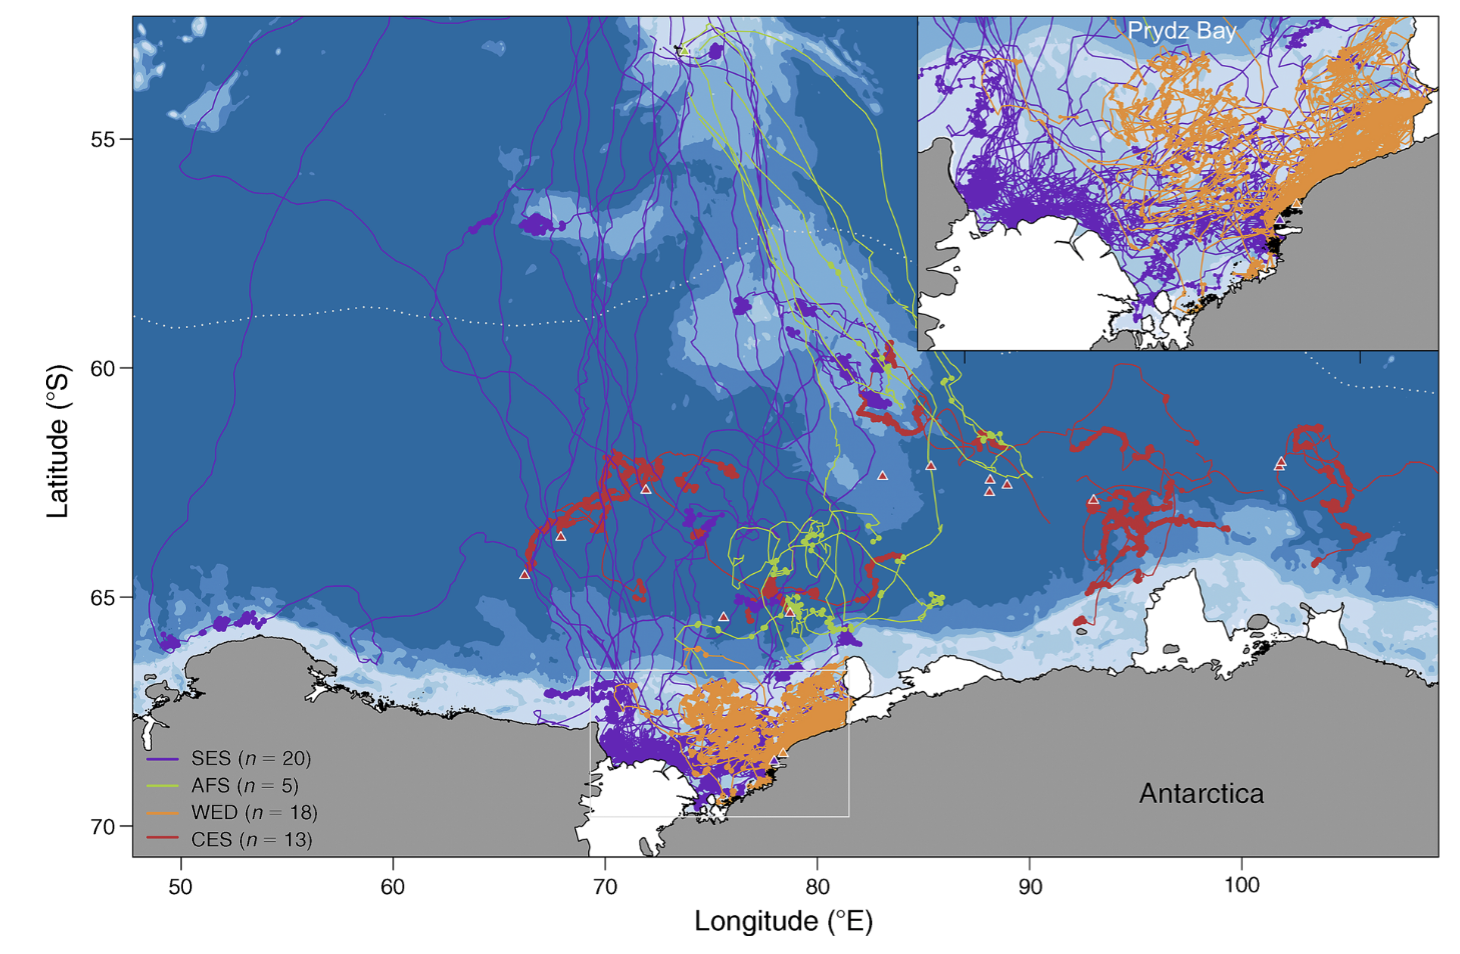

In [2]:
display(Image("./images/presentation3.png", width=500, embed=True))

## Last time, on Space-Time Analytics...

* Space-Time Interactions
* Space-Time Clustering
* CSTR Null Hypothesis
* Formal 'Tests'
    * Knox, Mantel, Jacquez, ...
* Concepts of nearness in space **and** time
* Working with 'nice' `PySAL` data

## Real-World Datasets

* Most stats classes, **don't** use 'real-world' data
    * At least not as initially collected/stored
* Why? Because most real-world data is *messy*
        
</div>
<div class="alert alert-info", style="font-size: 0.8em;">
This lecture is largely based on [Hadley Wickham's Tidy Data](https://github.com/hadley/tidy-data) paper, so it is [required reading this week](#Lab/Assignment-Time!)!
</div>


## Data Munging

> It is often said that 80% of data analysis is spent on the process of cleaning and preparing the data.

\- Dasu, T., & Johnson, T. (2003). Exploratory data mining and data cleaning (Vol. 479). John Wiley & Sons.

## What is Messy Data?

> Happy families are all alike; every unhappy family is unhappy in its own way

-\ Leo Tolstoy

* Messy data are often convenient for showing to humans, as they are compact
    * Not so great for analysis, because they are complex

## Examples

In [3]:
messy = pd.DataFrame({'First' : ['John', 'Jane', 'Mary'], 
                      'Last' : ['Smith', 'Doe', 'Johnson'], 
                      'Treatment A' : [np.nan, 16, 3], 
                      'Treatment B' : [2, 11, 1]})
messy

,First,Last,Treatment A,Treatment B
0,John,Smith,NaN,2
1,Jane,Doe,16.0,11
2,Mary,Johnson,3.0,1


In [4]:
url = "https://docs.google.com/spreadsheets/d/1d-w9saSWgGMbRZlunxPjWcaJnMqQ5z-oAUNBVLlNQ-Y/pub?gid=0&single=true&output=csv"
famine = pd.read_csv(url)
famine.head()

,County,1841,1851,1861,1871,1881,1891,1901,1911,1926,1936,1951,1961,1971,1981,1991,2001
0,Antrim,361428,360498,372008,398624,413178,416143,543329,578704,608258,635692,661693,677512,663051,579750,591404,617462
1,Armagh,227190,189091,184138,171142,154515,135444,123018,117783,105693,102646,108739,111701,125461,127607,136469,144178
2,Carlow,81658,65222,54610,49012,44103,38734,35881,34498,33018,33127,32993,32248,33202,38646,39774,44829
3,Cavan,243094,173989,153870,140735,129476,111917,97451,91173,82452,76670,66377,56594,49345,53855,52796,56546
4,Clare,285456,211865,165884,147779,141379,124425,110658,102604,93685,88642,80264,72753,74104,86547,89864,102109


## What is Tidy Data?

> Tidy datasets provide a standardized way to link the structure of a dataset (its physical layout) with its semantics (its meaning).

## Data Semantics

* The **meaning** of the variables/observations
* Both examples do not make the *variable* of interest and its meaning clear
    * Context is lost
**Tidy data** preserves meaning, so that...

*A dataset becomes a collection of **values**... such that the values are organized in two ways: Every value belongs to a **variable** and an **observation**.*

## Treatments

* Using our first example, the variables are:
    1. `person`, with three possible values (John, Mary, and Jane).
    2. `treatment`, with two possible values (a and b).
    3. `result`, with five or six values depending on how you think of the missing value (`-`, `16`, `3`, `2`, `11`, `1`).

## Experimental Design

The experimental design tells us more about the *structure of the observations*.
* Hypothetical experiment?
    * Every combination of `person` and `treatment` was measured, a completely *crossed design*
* So why don't we store/display it like that...

In [5]:
tidy = pd.melt(messy, id_vars=['First','Last'])
tidy

,First,Last,variable,value
0,John,Smith,Treatment A,NaN
1,Jane,Doe,Treatment A,16.0
2,Mary,Johnson,Treatment A,3.0
3,John,Smith,Treatment B,2.0
4,Jane,Doe,Treatment B,11.0
5,Mary,Johnson,Treatment B,1.0


## Tidy Data Is...

* Data where...
    1. Each variable forms a column.
    2. Each observation forms a row.
    3. Each type of observational unit forms a table.

<br/>
<div class="alert alert-info", style="font-size: 0.8em;">
For database buffs, this is Codd’s 3rd normal form...
</div>

## General 'Rules'...

* It is easier to describe *functional* relationships between *variables* than between *rows*
    * `z` is a linear combination of `x` and `y`
    * `density` is the ratio of `weight` to `volume`
* It is easier to make comparisons between groups of observations than between groups of columns
    * Average of group `A` vs. average of group `B`

## Real-Life Problems

> Real datasets can, and often do, violate the three precepts of tidy data in almost every way imaginable.

* Column headers are values, not variable names
* Multiple variables stored in one column
* Variables stored in rows *and* columns
* Multiple types of observational units in *same* table
* Single observational unit stored in *multiple* tables

## [After the Irish Famine](http://bl.ocks.org/carsonfarmer/9791625)

In [6]:
IFrame("http://bl.ocks.org/carsonfarmer/raw/9791625/", 800, 550)

## Preserve Semantics

* Original Irish Famine  data violates *at least* 2 precepts of tidy data
* Think in terms of *what* we are trying to measure...
    * **Observational unit**
        * Irish population change
    * **Observations**
        * One population measurement per county per year
    * **Variables**
        * `County`, `Year`, and `Population`

In [7]:
tidy_famine = pd.melt(famine, id_vars=["County"],
                      var_name="Year", value_name="Population")
tidy_famine.head()

,County,Year,Population
0,Antrim,1841,361428
1,Armagh,1841,227190
2,Carlow,1841,81658
3,Cavan,1841,243094
4,Clare,1841,285456


              $\uparrow$ Now we have a 'molten' dataset

## Why Should You Care?

* Because the tools you use care!
* Consider statistical *modeling*
    * Domain specific language that connects responses $\rightarrow$ predictors
    * Linear combination of different variables
    * `y ~ x + m + j + k*e`
* Others
    * Visualization, `SQL`-like queries, and most importantly for this course...

## Space-Time Data

* Space-time data are often *very* messy...
    * But are semantically 'clean'
* Often measuring some **variable**, for multiple **observation** locations, over time
    * These three components make for clean data
    * Clear variables and observations

## Back to Models

* What if we wanted to...
    * ...model `something ~ time`?
    * ...do this for multiple locations?
    * ...do this for multiple variables?
* We **need** that linear combination:
    * `rate ~ county + time + income + education + ...`

## Semantics of Space-Time Data

| Location | Time/Date | Variable   |
|----------|-----------|------------|
| "A"      | Today     | Plenty     |
| "B"      | Tomorrow  | Not Enough |
| ...      | ...       | ...        |

* But why might this data structure be *problematic* for spatial data (in particular)?
    * What 'solutions' are available that we've already seen?

![That's all folks](http://media3.giphy.com/media/jYAGkoghdmD9S/giphy.gif)

## Lab/Assignment Time!

* *Read* [this paper](http://vita.had.co.nz/papers/tidy-data.pdf)
* *Clone* [this repository](https://github.com/carsonfarmer/Tidy-Data.git)\*
* *Create* a new branch called `lab-one`
* *Add/create* a new Notebook
    * With the features listed in the following cell
* *Submit* a 'Pull request' ([mac](https://github.com/blog/1946-create-pull-requests-with-github-for-mac), [windows](https://github.com/blog/1969-create-pull-requests-in-github-for-windows))
    * Message: `"{Name}'s Lab 1"`

<br/>
<div class="alert alert-info", style="font-size: 0.8em;">
\* Which is actually a repository that I 'forked' and modified [from here](https://github.com/jfpuget/Tidy-Data).
</div>

## Requirements

1. Load the required packages to...
2. Import a dataset from your area of expertise, and...
3. Tidy the dataset, before...
4. Visualizing, summarizing, and writing about it, using...
5. The following features of Jupyter Notebooks:
    * Header, table (from `Python`), hyperlink/url, code, figure, prose/description, and some `code`, an equation (e.g., $e = mc^2$), some *formatting*, and/or general **styling**

## Notes

* Be sure to sufficiently describe *where* your data came from, *how* you accessed it, and *what* it describes
* Bonus points if your data is particularly 'messy', or if you use spatial, temporal, or space-time data
* Ensure your Notebook *runs*, and try to have all required packages in the first cell